<a href="https://colab.research.google.com/drive/1IFVF-HoYcCPoTOuPMj0rl4A72uOjzsEj?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---

# DESAFIO CIENTISTA DE DADOS
## INDICIUM: LIGHTHOUSE
---
---


###### Autora: Aline de Castro Santos
###### Data: Julho de 2024

# **1. INTRODUÇÃO**

## 1.2. Dicionário dos dados

A base de dados de treinamento contém 15 colunas. Seus nomes e descrição das colunas são:

- Series_Title – Nome do filme
- Released_Year - Ano de lançamento
- ertificate - Classificação etária
- Runtime – Tempo de duração
- Genre - Gênero
- IMDB_Rating - Nota do IMDB
- Overview - Overview do filme
- Meta_score - Média ponderada de todas as críticas
- Director – Diretor
- Star1 - Ator/atriz #1
- Star2 - Ator/atriz #2
- Star3 - Ator/atriz #3
- Star4 - Ator/atriz #4
- No_of_Votes - Número de votos
- Gross - Faturamento


# **2. BIBLIOTECAS NECESSÁRIAS**

In [1]:
# Instalar dependências
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.1 MB/s eta 0:00:00


In [2]:
# Instalar dependências
!pip install transformers[torch] accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 27.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylin

In [79]:
# Importando as bibliotecas necessárias

import pandas as pd  # Para manipulação e análise de dados estruturados em tabelas
import numpy as np  # Para realizar operações matemáticas e manipular arrays multidimensionais
import matplotlib.pyplot as plt  # Para criação de gráficos estáticos, animados e interativos em 2D
import seaborn as sns  # Para criação de gráficos estatísticos mais atraentes e informativos baseados em Matplotlib
import scipy.stats as stats  # Para realizar cálculos estatísticos e operações matemáticas avançadas
import plotly.express as px  # Para criação de gráficos interativos de alto nível
import plotly.subplots as sp  # Para criação de subplots em gráficos Plotly
import plotly.graph_objs as go  # Para criação de gráficos Plotly de baixo nível com mais controle sobre o design
import statsmodels.formula.api as smf  # Para criação de modelos estatísticos e execução de testes estatísticos usando fórmulas
import statsmodels.api as sm  # Para acesso a funções estatísticas completas e modelos estatísticos
from wordcloud import WordCloud  # Para visualização de dados de texto através de nuvens de palavras
from sklearn.model_selection import train_test_split  # Para dividir dados em conjuntos de treinamento e teste
from sklearn.linear_model import LinearRegression  # Para realizar regressão linear e modelar relações entre variáveis
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report, accuracy_score, precision_recall_fscore_support  # Para calcular várias métricas de avaliação de modelo
import pickle  # Para serializar e desserializar objetos Python, permitindo que os objetos sejam salvos e carregados
from sklearn.ensemble import RandomForestRegressor  # Para realizar Random Forest, um método de aprendizado de máquina
from sklearn.impute import SimpleImputer  # Para preencher valores ausentes nos dados
from sklearn.model_selection import GridSearchCV  # Para ajustar os hiperparâmetros
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # Para converter uma coleção de documentos de texto em uma matriz de contagens de tokens
from sklearn.naive_bayes import MultinomialNB  # Para realizar a classificação Naive Bayes
from sklearn.pipeline import Pipeline  # Para simplificar a construção e a execução de workflows de aprendizado de máquina
from sklearn.decomposition import LatentDirichletAllocation  # Para realizar análise de tópicos
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer  # Para converter variáveis categóricas em uma representação binária
from textblob import TextBlob  # Para processamento de texto, incluindo análise de sentimento
import torch  # Para computação científica e aprendizado de máquina
from plotly.subplots import make_subplots  # Esta linha já foi importada como plotly.subplots as sp
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments  # Para processamento de linguagem natural com transformers
import re  # Para trabalhar com expressões regulares
import joblib  # Para serializar e desserializar objetos de aprendizado de máquina
import warnings  # Para controle de avisos

# Ignorar os avisos de desempenho do pandas
warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)

# Configuração para exibir gráficos diretamente no notebook
%matplotlib inline


# **3. CARREGANDO A BASE DE DADOS**

In [80]:
# Carregando os dados
df = pd.read_csv('desafio_indicium_imdb.csv')

# Visualização das primeiras cinco linhas do DataFrame
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


# **4. ANÁLISE EXPLORATÓRIA DOS DADOS**
## 4.1 Descrição dos dados

In [81]:
# Dimensionalidade do DataFrame (número de linhas, número de colunas)
df.shape

(999, 16)

In [82]:
# Informações gerais sobre os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [83]:
# Descrição estatística das variáveis numéricas
df.describe()

,Unnamed: 0,IMDB_Rating,Meta_score,No_of_Votes
count,999.000000,999.000000,842.000000,9.990000e+02
mean,500.000000,7.947948,77.969121,2.716214e+05
std,288.530761,0.272290,12.383257,3.209126e+05
min,1.000000,7.600000,28.000000,2.508800e+04
25%,250.500000,7.700000,70.000000,5.547150e+04
50%,500.000000,7.900000,79.000000,1.383560e+05
75%,749.500000,8.100000,87.000000,3.731675e+05
max,999.000000,9.200000,100.000000,2.303232e+06


In [84]:
# Número de valores nulos em cada coluna
df.isnull().sum()

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

## 4.1. Tratamento dos dados nulos
- Coluna “Certificate” (Classificação Etária): <br>
A coluna “Certificate” indica a classificação etária do filme (por exemplo, “A”, “UA”, “U”, etc.). É uma variável categórica importante para entender o público-alvo do filme.<br>
Foi preenchido os valores nulos com a moda (valor mais frequente) dessa coluna, pois a classificação mais comum provavelmente representa a tendência geral dos filmes no dataset.<br>
 <br>

In [85]:
# Preenchendo valores nulos na coluna "Certificate" com a moda
df['Certificate'].fillna(df['Certificate'].mode()[0], inplace=True)

- Coluna “Meta_score” (Média Ponderada de Críticas): <br>
“Meta_score” é uma métrica que reflete a qualidade do filme com base em avaliações de críticos. É uma variável numérica relevante para entender o desempenho do filme. <br>
Os valores nulos foram preenchidos com a média dos valores não nulos. Isso ajuda a manter a consistência e a evitar distorções nos dados. A média é uma estimativa razoável para preencher esses valores ausentes. <br>
 <br>


In [86]:
# Preenchendo valores nulos na coluna "Meta_score" com a média
df['Meta_score'].fillna(df['Meta_score'].mean(), inplace=True)

- Coluna “Gross” (Faturamento): <br>
O faturamento é uma métrica crucial para avaliar o sucesso financeiro de um filme. Queremos entender como essa variável se relaciona com outras características. <br>
A coluna “Gross” foi convertida para valores numéricos (removendo vírgulas) e os valores nulos foram preenchidos com a média do faturamento. Isso permite manter a integridade dos dados e usar uma estimativa realista para os valores ausentes.

In [87]:
# Convertendo a coluna "Gross" para valores numéricos (removendo vírgulas e convertendo para float)
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)

# Preenchendo valores nulos na coluna "Gross" com a média do faturamento
df['Gross'].fillna(df['Gross'].mean(), inplace=True)

In [88]:
# Verificando se os valores nulos foram tratados
print(df.isnull().sum())

Unnamed: 0       0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64



## **4.2**. Tratamento dos tipos de dados


In [89]:
# Verificando os tipos de dados de cada coluna
df.dtypes

Unnamed: 0         int64
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

* Released_Year (Ano de lançamento):<br>

Tipo original: object (string).<br>
Tipo desejado: int ou float.<br>
Motivo: Os anos de lançamento são valores numéricos que representam um ponto no tempo. Para realizar operações numéricas, ordenações ou filtrar dados por ano, é necessário que essa coluna esteja no formato numérico.




In [90]:
# Convertendo a coluna 'Released_Year' para int
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

*  (Tempo de duração):<br>

Tipo original: object (string).<br>
Tipo desejado: float.<br>
Motivo: A duração do filme está representada como uma string, incluindo a unidade "min". Para realizar análises quantitativas, como calcular a média de duração dos filmes, é necessário extrair apenas o valor numérico e convertê-lo para um tipo numérico.




In [91]:
# Extraindo apenas o número de minutos da coluna 'Runtime' e converter para int
df['Runtime'] = df['Runtime'].str.extract('(\d+)').astype(float)

* Gross (Faturamento): <br>

Tipo original: object (string). <br>
Tipo desejado: float.<br>
Motivo: O faturamento está representado como uma string que inclui símbolos de pontuação, como vírgulas. Para realizar operações numéricas, como calcular a soma ou a média do faturamento, é necessário remover os símbolos de pontuação e converter para um tipo numérico.
obs.: Essa coluna já havia sido convertida no passo anterior, ao tratar dados nulos

In [92]:
# Verificando novamente os tipos de dados após o tratamento
df.dtypes

Unnamed: 0         int64
Series_Title      object
Released_Year    float64
Certificate       object
Runtime          float64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

## 4.3. Visualização da distribuição dos dados

### 4.3.1. Histograma para Nota do IMDB (IMDB_Rating)





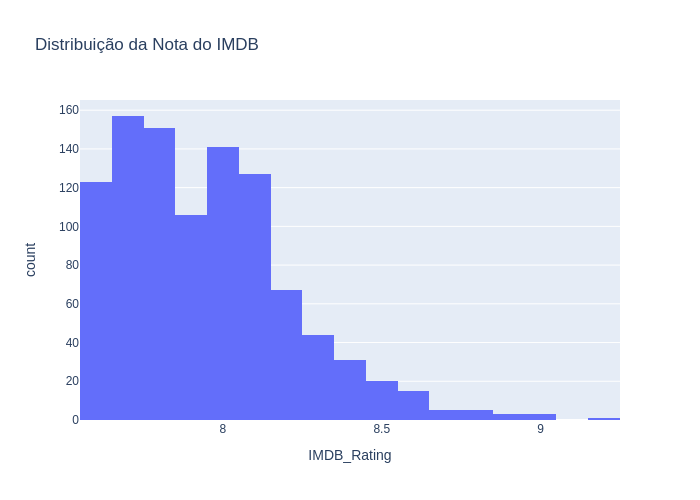

In [93]:
# Histograma para IMDB_Rating
fig_imdb = px.histogram(df, x='IMDB_Rating', nbins=20, title='Distribuição da Nota do IMDB')
fig_imdb.show('png')

**ANÁLISE:** O histograma mostra uma distribuição de notas do IMDb concentradas principalmente entre 7.6 e 8.6, com a frequência mais alta na marca de 7.7. Isso reforça a observação de que um número significativo de filmes é classificado como acima da média, mas não muitos recebem notas muito altas, que estariam mais próximas de 10. <br>

Essa consistência na distribuição sugere que o conjunto de dados analisado tem uma dispersão relativamente padrão de notas de filmes, com a maioria dos filmes sendo considerada boa, mas não excepcional, pelos usuários do IMDb.

### 4.3.2. Histograma para Meta_score (Média ponderada de todas as críticas )

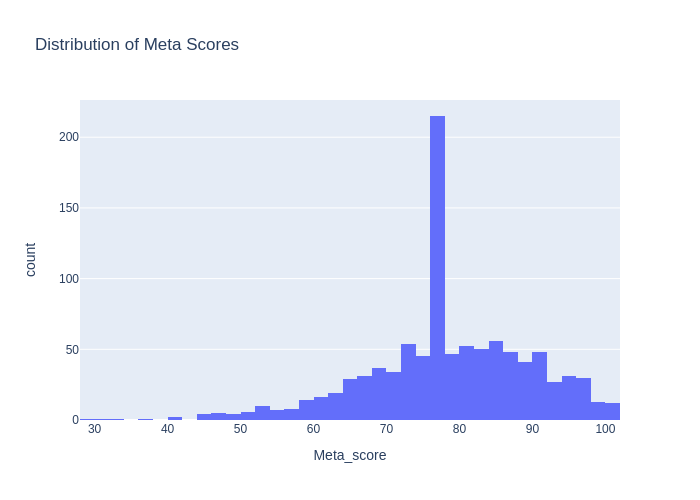

In [94]:
# Histograma para Meta_score
fig_Meta_score = px.histogram(df, x='Meta_score', title='Distribution of Meta Scores')
fig_Meta_score.show('png')

**ANÁLISE:** O aspecto mais interessante deste histograma é o pico proeminente em torno da pontuação de 76 a 77.99, onde há um aumento significativo na contagem em comparação com outras faixas de pontuação. Isso sugere que um grande número de entradas recebeu um Meta Score em torno desse valor. O resto da distribuição parece relativamente normal, com menos contagens nas extremidades inferior e superior da faixa de pontuação. <br>


### 4.3.3. Histograma para No_of_Votes (Número de Votos)

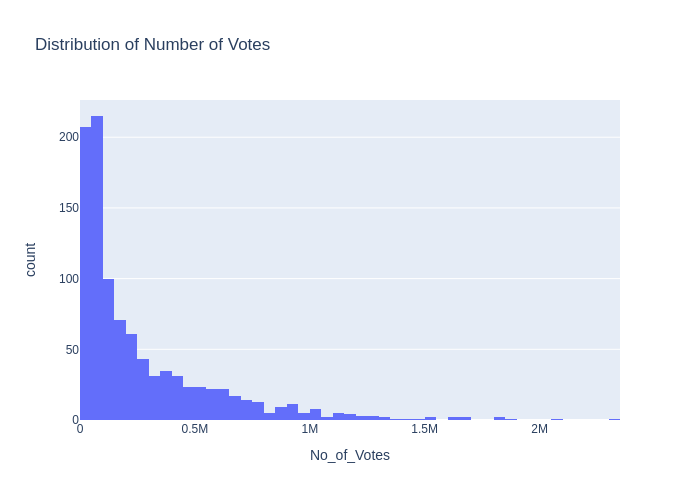

In [95]:
# Histograma para No_of_Votes
fig_No_of_Votes = px.histogram(df, x='No_of_Votes', title='Distribution of Number of Votes')
fig_No_of_Votes.show('png')


**ANÁLISE:** O histograma de distribuição do número de votos mostra uma distribuição inclinada para a direita, com a maioria dos dados concentrados no lado esquerdo, indicando que há mais instâncias com menos votos e menos instâncias com um grande número de votos. Isso sugere que, a maioria dos filmes recebe apenas um pequeno número de votos, enquanto apenas alguns recebem muitos votos.


### 4.3.4. Histograma para Gross (Faturamento)

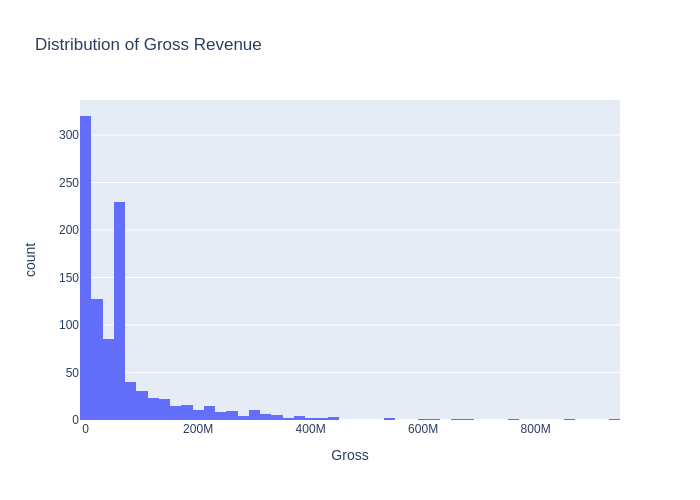

In [96]:
# Histogram for Gross
fig_Gross = px.histogram(df, x='Gross', title='Distribution of Gross Revenue')
fig_Gross.show('png')

**ANÁLISE:** A barra mais alta localizada no lado esquerdo do histograma, indica que a maioria dos pontos de dados cai dentro da faixa de receita bruta mais baixa (0-100M). À medida que a receita bruta aumenta, a frequência diminui significativamente, mostrando menos ocorrências em faixas de receita bruta mais altas.



### 4.3.5. Histograma para Genre (Gênero)




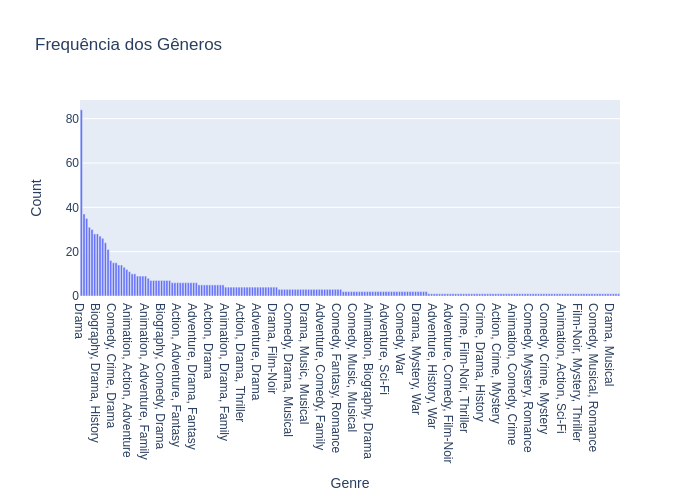

In [97]:
# Contar a frequência de cada gênero e ordenar do maior para o menor
genre_counts = df['Genre'].value_counts().sort_values(ascending=False)

# Criar um DataFrame a partir da série ordenada
genre_df = pd.DataFrame({'Genre': genre_counts.index, 'Count': genre_counts.values})

# Criar o gráfico de barras com as barras ordenadas
fig_genre = px.bar(genre_df, x='Genre', y='Count', title='Frequência dos Gêneros')
fig_genre.update_layout(xaxis={'categoryorder':'total descending'})
fig_genre.show('png')

**ANÁLISE:** Observa-se que o primeiro gênero, DRAMA, possui uma contagem significativamente maior (84) do que os outros, indicando uma frequência muito mais alta. Os outros gêneros mostram uma diminuição progressiva na contagem, sugerindo que há menos itens pertencentes a esses gêneros.

Os gêneros listados incluem uma variedade de combinações como "Adventure, Mystery, Thriller", "Drama, Musical", e "Crime, Drama, Sci-Fi", entre outros. A distribuição sugere que DRAMA é o gênero mais popular, enquanto os outros têm uma presença mais moderada ou baixa.



### 4.3.6. Histograma para Certificate (frequência de classificação etária)


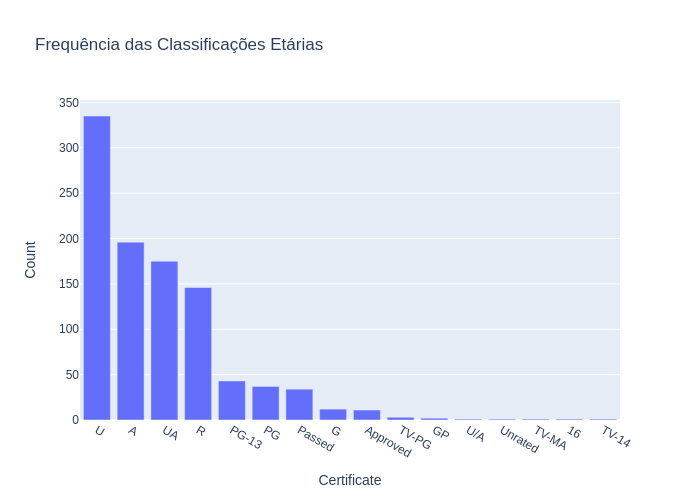

In [98]:
# Contar a frequência de cada classificação etária e ordenar do maior para o menor
certificate_counts = df['Certificate'].value_counts().sort_values(ascending=False)

# Criar um DataFrame a partir da série ordenada
certificate_df = pd.DataFrame({'Certificate': certificate_counts.index, 'Count': certificate_counts.values})

# Criar o gráfico de barras com as barras ordenadas
fig_certificate = px.bar(certificate_df, x='Certificate', y='Count', title='Frequência das Classificações Etárias')
fig_certificate.update_layout(xaxis={'categoryorder':'total descending'})
fig_certificate.show('png')

**ANÁLISE**: A categoria ‘U’ tem a maior contagem de frequência, com 335, seguida pelas  ‘A’, ‘UA’, e ‘R’, que têm contagens progressivamente menores, variando de 196 a 146. As categorias de ‘PG-13’ a ‘Approved’ têm frequências relativamente baixas em comparação com as categorias iniciais. Por fim, tanto ‘TMA-14’, ‘16’, ‘TV-MA’, ‘Unrated’, ‘U/A’, ‘GP’ e ‘TV-PG’ têm as menores frequências neste gráfico.

### 4.3.7. Boxplot para Faturamento e Tempo de Duração

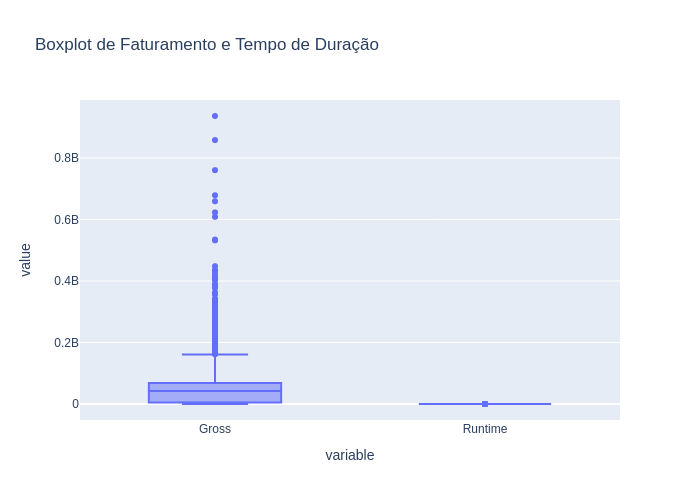

In [99]:
# Exibindo o boxplot de Faturamento e Tempo de Duração
fig_boxplot = px.box(df, y=['Gross', 'Runtime'], title='Boxplot de Faturamento e Tempo de Duração')
fig_boxplot.show('png')


**ANÁLISE:** O boxplot para 'Gross' mostra uma ampla gama de valores com vários outliers acima do bigode superior, indicando que existem alguns valores brutos significativamente mais altos que o resto. A mediana está mais próxima do quartil inferior, sugerindo uma distribuição inclinada para valores brutos mais baixos. <br>
Por outro lado, o boxplot de 'Runtime' é muito mais compacto, sem outliers visíveis, e sua mediana está centralizada dentro da caixa, indicando uma distribuição mais simétrica dos valores de duração.




### 4.3.8. Scatterplot entre Nota do IMDB e Faturamento:

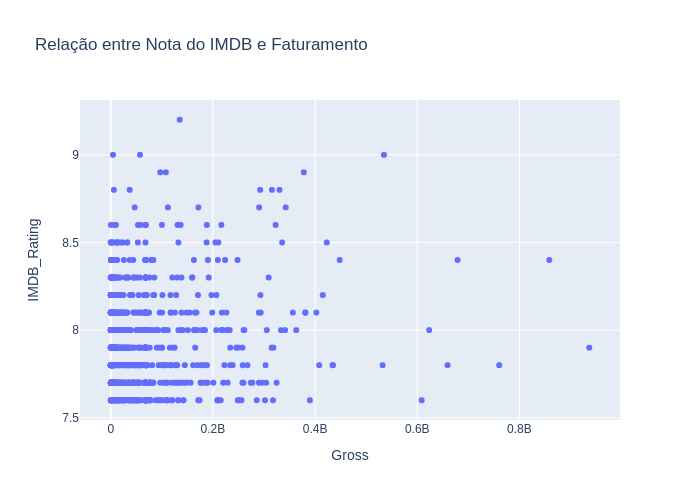

In [100]:
# Exibindo o gráfico de dispersão da relação entre Nota do IMDB e Faturamento
fig_scatter = px.scatter(df, x='Gross', y='IMDB_Rating', title='Relação entre Nota do IMDB e Faturamento')
fig_scatter.show('png')


**ANÁLISE:** O gráfico mostra pontos individuais que representam diferentes filmes, com sua posição determinada pela classificação do IMDB e pelo faturamento bruto. Há uma concentração de pontos entre a faixa de classificação de 7.6 a 8.1 no eixo vertical, e estes estão espalhados por uma ampla gama de receitas brutas no eixo horizontal. Existem menos pontos com classificações mais altas do IMDB acima de 8.4, e estes também abrangem várias receitas brutas, mas não mostram uma tendência ou correlação clara entre a classificação do IMDB e a receita bruta com base nesta visualização. <br>

Essa imagem é interessante ou relevante, pois tenta visualizar qualquer relação potencial entre o sucesso crítico dos filmes, refletido por suas classificações no IMDB, e seu sucesso comercial indicado por suas receitas (faturamento). No entanto, não parece haver uma correlação visível forte entre classificações mais altas e maiores receitas, sugerindo que outros fatores podem influenciar o sucesso financeiro de um filme além de seu aclamação crítica.

### 4.3.9. Boxplots para Meta Scores (Média ponderada das críticas), Number of Votes (Número de votos) e Gross (Faturamento)

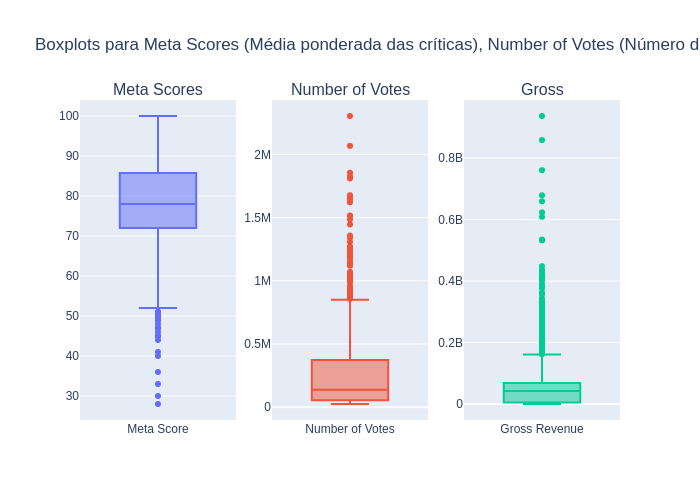

In [101]:
# Criando subplots
fig = make_subplots(rows=1, cols=3, subplot_titles=('Meta Scores', 'Number of Votes', 'Gross'))

# Adiconando boxplots aos subplots
fig.add_trace(go.Box(y=df['Meta_score'], name='Meta Score'), row=1, col=1)
fig.add_trace(go.Box(y=df['No_of_Votes'], name='Number of Votes'), row=1, col=2)
fig.add_trace(go.Box(y=df['Gross'], name='Gross Revenue'), row=1, col=3)

# Imprimeindo os boxplots
fig.update_layout(title_text='Boxplots para Meta Scores (Média ponderada das críticas), Number of Votes (Número de votos) e Gross (Faturamento)', showlegend=False)
fig.show('png')


**ANÁLISE:** Com base nos boxplots apresentados, tira-se as seguintes conclusões:

1. **Meta Scores (Média ponderada das críticas):**
   - A maioria dos filmes tem uma avaliação próxima à mediana, que está em torno de 70.
   - Existem alguns filmes com notas muito baixas (outliers abaixo do limite inferior), indicando que nem todos os filmes são bem recebidos pela crítica.
   - A faixa interquartil (IQR) sugere que a maioria dos filmes está concentrada entre 60 e 80.

2. **Número de Votos:**
   - A mediana está abaixo de 1 milhão de votos, indicando que a maioria dos filmes não recebeu uma quantidade significativa de votos.
   - No entanto, há vários filmes com um número excepcionalmente alto de votos (outliers acima do limite superior).
   - Isso sugere que alguns filmes atraem uma base de fãs muito grande, enquanto outros não.

3. **Faturamento (Gross):**
   - A mediana do faturamento está em torno de 0,2 bilhão.
   - A IQR indica que a maioria dos filmes tem um faturamento entre 0,05 bilhão e 0,25 bilhão.
   - Alguns filmes têm faturamentos extremamente altos (outliers acima do limite superior), possivelmente devido a grandes sucessos de bilheteria.



## 4.4. Tratamento de Outliers
> Em setores onde grandes variações são comuns, como na indústria do cinema, a presença de outliers é frequentemente uma indicação de filmes que se destacam de forma significativa. Esses outliers podem representar tanto grandes sucessos quanto fracassos notáveis, ambos essenciais para uma compreensão completa do desempenho e das tendências no setor cinematográfico. Portanto, ao não tratar ou remover esses outliers, garantimos que a análise e os modelos preditivos mantenham a integridade e a representatividade dos dados.


### Justificativa para o Não Tratamento de Outliers

Em setores onde grandes variações são comuns, como na indústria do cinema, a presença de outliers é frequentemente uma indicação de filmes que se destacam de forma significativa. Esses outliers podem representar tanto grandes sucessos quanto fracassos notáveis, ambos essenciais para uma compreensão completa do desempenho e das tendências no setor cinematográfico. Portanto, ao não tratar ou remover esses outliers, garantimos que a análise e os modelos preditivos mantenham a integridade e a representatividade dos dados. Aqui estão algumas razões específicas para não tratar os outliers nesta base de dados:

1. **Representatividade dos Dados**:
   - **Filmes de Sucesso**: Filmes que alcançaram grande sucesso em termos de bilheteria, número de votos ou altas notas de críticos e do público são importantes para a análise. Remover esses outliers pode levar a uma sub-representação de filmes que definem tendências ou que são marcos na indústria.
   - **Fracassos Significativos**: Da mesma forma, filmes que tiveram desempenho excepcionalmente ruim também fornecem insights valiosos sobre os fatores que podem levar ao fracasso.

2. **Variação Intrínseca da Indústria**:
   - A indústria cinematográfica é caracterizada por uma grande variação no desempenho dos filmes. Essa variação é esperada e natural, refletindo diversos fatores como orçamento, marketing, elenco, crítica e aceitação do público. Ao manter os outliers, preservamos a complexidade e a variabilidade inerente ao setor.

3. **Importância para Modelos Preditivos**:
   - **Modelos de Regressão**: Em um modelo de regressão, outliers podem ajudar a capturar extremos e a ajustar o modelo para que ele possa fazer previsões mais precisas em uma faixa mais ampla de valores.
   - **Modelos de Classificação**: Para problemas de classificação, os outliers podem ser cruciais para identificar classes minoritárias ou comportamentos excepcionais.

4. **Insights de Negócios**:
   - Filmes que se destacam podem proporcionar insights valiosos sobre o que contribui para um sucesso inesperado ou um fracasso. Isso pode informar decisões estratégicas em produção, marketing e distribuição.

5. **Equidade e Inclusão**:
   - Remover outliers pode inadvertidamente introduzir vieses, especialmente se esses outliers representam filmes de nichos ou gêneros específicos que são sub-representados na amostra. Manter todos os dados ajuda a garantir que todas as vozes e experiências sejam consideradas.

### Exemplos Concretos
- **"Avengers: Endgame"**: Com receitas de bilheteria extraordinariamente altas, este filme é um outlier que demonstra o potencial de receitas na indústria cinematográfica moderna.
- **"The Room"**: Considerado um dos piores filmes já feitos, seu desempenho peculiar fornece insights sobre filmes de culto e fracassos notáveis.

### Conclusão
> Portanto, ao não tratar os outliers na base de dados, asseguramos que todas as nuances e variações significativas da indústria cinematográfica sejam capturadas. Isso não só melhora a precisão dos modelos preditivos, mas também fornece uma visão mais completa e informada do setor, permitindo decisões estratégicas mais acertadas e uma compreensão mais profunda das dinâmicas do mercado cinematográfico.

# **5. HIPÓTESES DE NEGÓCIOS**




## 5.1.   Qual filme você recomendaria para uma pessoa que você não conhece?




Ao indicar um filme, é crucial considerar o gosto pessoal do indivíduo. Se a pessoa possui um gênero favorito, obras aclamadas dentro dessa categoria serão sugeridas. <br>

No entanto, se a pessoa não demonstra uma preferência específica por gêneros, explorar filmes com altas avaliações pode ser uma ótima alternativa. Afinal, quanto mais bem avaliado um filme for, maior a probabilidade de agrado do público em geral. Essa estratégia aumenta as chances de encontrar uma obra que agrade o espectador, mesmo que ele ainda não tenha um gênero favorito definido.

In [102]:
# Filtrando os filmes com avaliação maior que 8,5
filmes_alta_avaliacao = df[df['IMDB_Rating'] > 8.5]

# Ordenando os filmes pela nota do IMDB em ordem decrescente
filmes_ordenados = filmes_alta_avaliacao.sort_values(by='IMDB_Rating', ascending=False)

# Exibindo os filmes ordenados com suas respectivas notas
print("Filmes com avaliação maior que 8,5 que serão indicados a uma pessoa desconhecida:")
for index, row in filmes_ordenados.iterrows():
    print(f"{row['Series_Title']} - Nota IMDB: {row['IMDB_Rating']}")

Filmes com avaliação maior que 8,5 que serão indicados a uma pessoa desconhecida:
The Godfather - Nota IMDB: 9.2
The Godfather: Part II - Nota IMDB: 9.0
12 Angry Men - Nota IMDB: 9.0
The Dark Knight - Nota IMDB: 9.0
The Lord of the Rings: The Return of the King - Nota IMDB: 8.9
Pulp Fiction - Nota IMDB: 8.9
Schindler's List - Nota IMDB: 8.9
Inception - Nota IMDB: 8.8
Fight Club - Nota IMDB: 8.8
The Lord of the Rings: The Fellowship of the Ring - Nota IMDB: 8.8
Forrest Gump - Nota IMDB: 8.8
Il buono, il brutto, il cattivo - Nota IMDB: 8.8
Goodfellas - Nota IMDB: 8.7
Star Wars: Episode V - The Empire Strikes Back - Nota IMDB: 8.7
One Flew Over the Cuckoo's Nest - Nota IMDB: 8.7
The Matrix - Nota IMDB: 8.7
The Lord of the Rings: The Two Towers - Nota IMDB: 8.7
The Green Mile - Nota IMDB: 8.6
Shichinin no samurai - Nota IMDB: 8.6
Seppuku - Nota IMDB: 8.6
Star Wars - Nota IMDB: 8.6
The Silence of the Lambs - Nota IMDB: 8.6
Se7en - Nota IMDB: 8.6
La vita è bella - Nota IMDB: 8.6
Saving Priva

Caso a pessoa em questão tenha um gênero de filme favorito, a indicação seria escolher o filme ou os filmes mais bem avaliados de acordo com o gênero:

In [103]:
# Obtendo os valores únicos na coluna 'Genre' (gênero)
valores_unicos_coluna1 = df['Genre'].unique()

# Ordenando os valores em ordem alfabética
valores_unicos_coluna1.sort()

# Exibindo os valores únicos ordenados por ordem alfabética indicando os gêneros de filmes possíveis:
print(f"Gêneros dos filmes: {valores_unicos_coluna1}")

Gêneros dos filmes: ['Action, Adventure' 'Action, Adventure, Biography'
 'Action, Adventure, Comedy' 'Action, Adventure, Crime'
 'Action, Adventure, Drama' 'Action, Adventure, Family'
 'Action, Adventure, Fantasy' 'Action, Adventure, History'
 'Action, Adventure, Horror' 'Action, Adventure, Mystery'
 'Action, Adventure, Romance' 'Action, Adventure, Sci-Fi'
 'Action, Adventure, Thriller' 'Action, Adventure, War'
 'Action, Adventure, Western' 'Action, Biography, Crime'
 'Action, Biography, Drama' 'Action, Comedy, Crime'
 'Action, Comedy, Fantasy' 'Action, Comedy, Mystery'
 'Action, Comedy, Romance' 'Action, Crime, Comedy' 'Action, Crime, Drama'
 'Action, Crime, Mystery' 'Action, Crime, Thriller' 'Action, Drama'
 'Action, Drama, History' 'Action, Drama, Mystery' 'Action, Drama, Sci-Fi'
 'Action, Drama, Sport' 'Action, Drama, Thriller' 'Action, Drama, War'
 'Action, Drama, Western' 'Action, Mystery, Thriller' 'Action, Sci-Fi'
 'Action, Sci-Fi, Thriller' 'Action, Thriller'
 'Adventure, Biog

In [105]:
# Solicitando ao usuário o gênero favorito
genero_favorito = input("Digite o seu gênero de filme favorito: ")

# Filtrando os filmes pelo gênero favorito
filmes_por_genero = df[df['Genre'] == genero_favorito]

# Encontrando a maior avaliação no IMDB para o gênero selecionado
maior_avaliacao = filmes_por_genero['IMDB_Rating'].max()

# Filtrando os filmes que têm a maior avaliação no IMDB
filmes_maior_avaliacao = filmes_por_genero[filmes_por_genero['IMDB_Rating'] == maior_avaliacao][['Series_Title', 'IMDB_Rating']]

# Listando os filmes com a maior avaliação de acordo com o gênero de filme escolhido
print(f"Os filmes com a maior avaliação no IMDB no gênero '{genero_favorito}' são:")
for index, row in filmes_maior_avaliacao.iterrows():
    print(f"{row['Series_Title']} - Nota IMDB: {row['IMDB_Rating']}")

Digite o seu gênero de filme favorito: Crime, Drama
Os filmes com a maior avaliação no IMDB no gênero 'Crime, Drama' são:
The Godfather - Nota IMDB: 9.2


Assim, se, por exemplo, o gênero favorito da pessoa for 'Crime, Drama', o filme indicado seria: The Godfather, que tem uma excelente avaliação de 9.2 e é um clássico atemporal que se destaca por sua história envolvente, personagens memoráveis, direção impecável e reflexões profundas. Considerado por muitos o melhor filme de todos os tempos, é uma obra obrigatória para qualquer cinéfilo que busca uma experiência cinematográfica enriquecedora e marcante.

## 5.2.   Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?



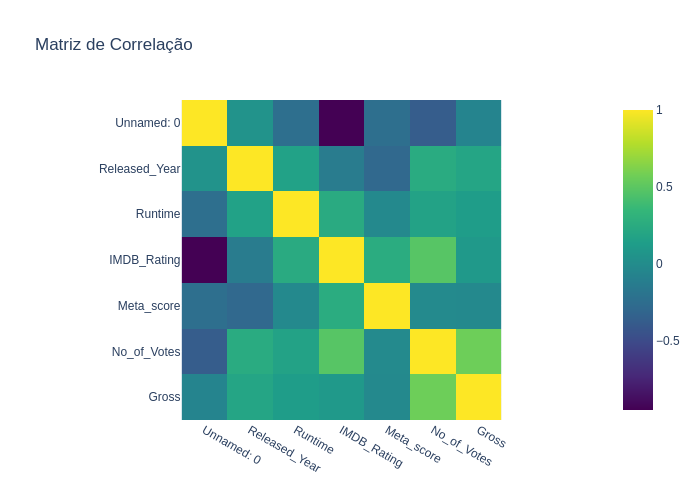

In [106]:
# Selecionando apenas as colunas numéricas para a matriz de correlação
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculando a matriz de correlação
correlation_matrix_img = numeric_df.corr()

# Gerando o mapa de calor
fig_matrix = px.imshow(correlation_matrix_img, color_continuous_scale='viridis', title='Matriz de Correlação')

# Mostrar a figura
fig_matrix.show('png')

In [107]:
# Calculando a matriz de correlação
correlation_matrix = numeric_df.corr()

# Exibir a matriz de correlação
correlation_matrix

,Unnamed: 0,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
Unnamed: 0,1.000000,0.048169,-0.237519,-0.946472,-0.242474,-0.373076,-0.063324
Released_Year,0.048169,1.000000,0.165765,-0.133257,-0.289287,0.246005,0.192868
Runtime,-0.237519,0.165765,1.000000,0.242751,-0.027926,0.172483,0.124919
IMDB_Rating,-0.946472,-0.133257,0.242751,1.000000,0.256122,0.479308,0.092968
Meta_score,-0.242474,-0.289287,-0.027926,0.256122,1.000000,-0.019238,-0.030809
No_of_Votes,-0.373076,0.246005,0.172483,0.479308,-0.019238,1.000000,0.563484
Gross,-0.063324,0.192868,0.124919,0.092968,-0.030809,0.563484,1.000000


### 5.2.1. Principais Percepções:

1. **Correlação entre `IMDB_Rating` e `No_of_Votes` (0.479308)**:
   - Existe uma correlação moderada positiva entre a avaliação do IMDB e o número de votos. Isso sugere que filmes bem avaliados tendem a receber mais votos, ou vice-versa.

2. **Correlação entre `No_of_Votes` e `Gross` (0.563484)**:
   - Existe uma correlação moderada positiva entre o número de votos e o faturamento. Filmes que recebem mais votos tendem a ter maior faturamento. Isso pode ser devido à popularidade: filmes populares têm mais espectadores e, portanto, maior receita.

3. **Correlação entre `IMDB_Rating` e `Meta_score` (0.256122)**:
   - Existe uma correlação positiva fraca entre a avaliação do IMDB e a pontuação Meta. Isso indica que, embora haja alguma relação, não é muito forte, sugerindo que críticos e público podem ter opiniões divergentes sobre filmes.

4. **Correlação negativa entre `IMDB_Rating` e `Unnamed: 0` (-0.946472)**:
   - Uma forte correlação negativa entre `Unnamed: 0` e `IMDB_Rating` não é intuitiva e pode sugerir que `Unnamed: 0` (talvez uma coluna de índice) tenha alguma relação artificial ou não significativa com as avaliações do IMDB. Isso deve ser investigado ou ignorado se for um índice.

5. **Correlação entre `Released_Year` e `No_of_Votes` (0.246005)**:
   - Há uma correlação fraca positiva entre o ano de lançamento e o número de votos. Filmes mais recentes tendem a receber mais votos, possivelmente devido ao aumento no uso de plataformas online e mídias sociais.

6. **Correlação entre `Released_Year` e `Gross` (0.192868)**:
   - Existe uma correlação fraca positiva entre o ano de lançamento e o faturamento. Filmes mais recentes tendem a ter maior faturamento, o que pode estar relacionado à inflação e ao aumento dos preços dos ingressos.

### Fatores Relacionados com Alta Expectativa de Faturamento:

1. **Número de Votos (`No_of_Votes`)**:
   - A correlação mais forte com o faturamento é o número de votos. Filmes com mais votos tendem a ter maior faturamento, indicando que a popularidade é um fator crucial.

2. **Ano de Lançamento (`Released_Year`)**:
   - Filmes mais recentes tendem a ter maior faturamento, embora a correlação não seja muito forte. Isso pode ser devido a melhorias na tecnologia de marketing e distribuição.

3. **Runtime**:
   - Existe uma correlação positiva fraca com o faturamento. Filmes mais longos tendem a ter maior faturamento, possivelmente devido a valores de produção mais altos e maior profundidade da história.

### Conclusão:

> A análise da matriz de correlação indica que a popularidade (medida pelo número de votos) é um dos principais fatores relacionados ao alto faturamento de um filme. Além disso, o ano de lançamento e o tempo de duração do filme também mostram correlações positivas com o faturamento, sugerindo que filmes mais recentes e mais longos tendem a gerar mais receita. As avaliações do IMDB e as pontuações Meta têm correlações mais fracas com o faturamento, indicando que outros fatores podem ser mais influentes na geração de receita.

## 5.3.   Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

### 5.3.1 Mapa de Palavras

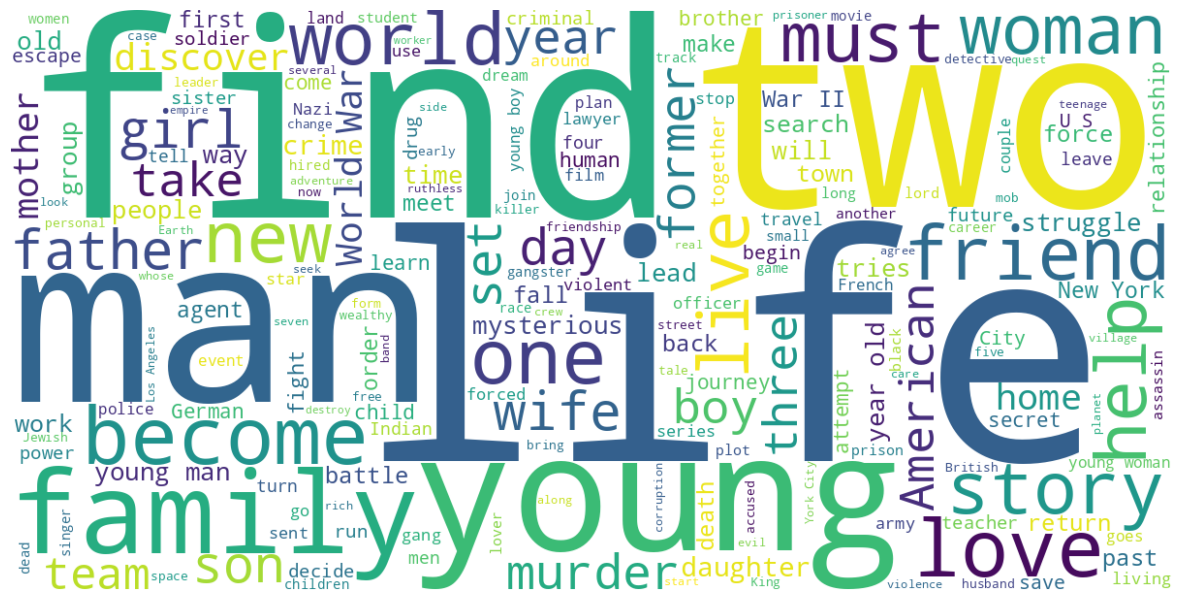

In [108]:
# Juntando todos os textos da coluna 'Overview'
text = " ".join(review for review in df['Overview'].astype(str))

# Gerando o mapa de palavras
wordcloud = WordCloud(width=1200, height=600, background_color ='white').generate(text)

# Plotando o mapa de palavras
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


O mapa de palavras gerado a partir da coluna "Overview" oferece insights interessantes sobre os temas e conceitos frequentes nos resumos dos filmes:

1. **Temas Recorrentes**:
   - As palavras "love", "life" e "family" são proeminentes. Isso sugere que muitos filmes abordam relacionamentos, crescimento pessoal e laços familiares.
   - "World", "story" e "find" também aparecem, indicando que as histórias podem se desenrolar em diferentes contextos e envolver descobertas ou jornadas.
   - A presença de "young" sugere que muitos filmes podem ter protagonistas jovens ou explorar temas da juventude.

2. **Gênero do Filme**:
   - Infelizmente, inferir o gênero do filme apenas com base na coluna "Overview" pode ser desafiador. Embora algumas palavras possam sugerir gêneros específicos (por exemplo, "murder" para suspense ou crime), a variedade de termos presentes torna difícil uma classificação definitiva.

3. **Limitações:**
   - A nuvem de palavras não considera contexto ou estrutura narrativa. Portanto, não pode-se afirmar com certeza o gênero de um filme apenas com base nesses termos.

> Em resumo, a coluna "Overview", com base no mapa de palavras, fornece uma visão geral dos temas e tópicos abordados nos filmes, mas não é suficiente para determinar o gênero com precisão.

### 5.3.2. Análise de tópicos

In [109]:
# Pré-processamento de texto
df['Overview'] = df['Overview'].str.lower().str.replace('[^\w\s]', '')

# Função para obter o sentimento
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Aplicando a função de sentimento
df['Sentiment'] = df['Overview'].apply(get_sentiment)

# Contagem de filmes por valor de sentimento
sentiment_counts = df['Sentiment'].value_counts().sort_index()

# Exibindo resumo estatístico
print("Resumo Estatístico do Sentimento:")
print(df['Sentiment'].describe())


Resumo Estatístico do Sentimento:
count    999.000000
mean       0.010785
std        0.250074
min       -1.000000
25%       -0.100000
50%        0.000000
75%        0.136364
max        1.000000
Name: Sentiment, dtype: float64


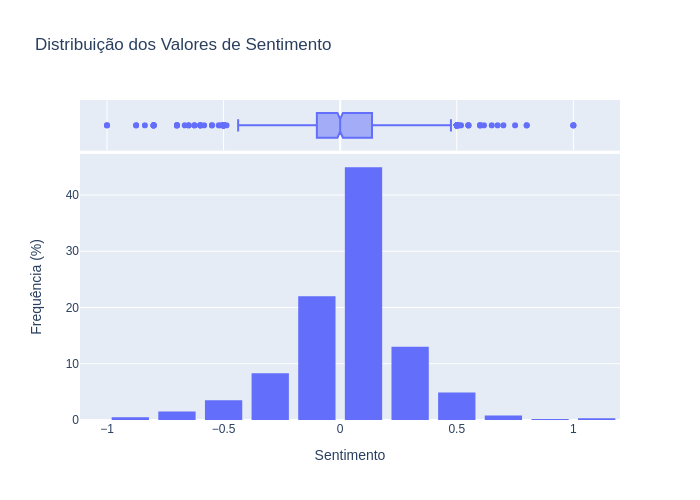

In [35]:
# Preprocessamento de texto
df['Overview'] = df['Overview'].str.lower().str.replace('[^\w\s]', '')

# Função para obter o sentimento
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Aplicando a função de sentimento
df['Sentiment'] = df['Overview'].apply(get_sentiment)

# Visualização a distribuição dos valores de sentimento com Plotly
fig_sentimento = px.histogram(df, x='Sentiment', nbins=20, title='Distribuição dos Valores de Sentimento',
                   labels={'Sentiment': 'Sentimento'}, marginal='box', histnorm='percent')

fig_sentimento.update_layout(
    xaxis_title='Sentimento',
    yaxis_title='Frequência (%)',
    bargap=0.2
)

fig_sentimento.show('png')


A análise estatística do sentimento das sinopses de filmes pode fornecer algumas inferências interessantes:

1. **Neutralidade predominante**: A mediana do sentimento próximo a zero sugere que muitas sinopses tendem a ser neutras em termos de polaridade emocional.

2. **Variedade de sentimentos**: A amplitude dos valores de sentimento (de -1 a 1) indica que há uma diversidade de emoções expressas nas sinopses, desde sentimentos positivos até negativos.

3. **Distribuição assimétrica**: A distribuição dos valores de sentimento, com um desvio padrão relativamente alto (0.250), sugere uma dispersão dos sentimentos, com alguns filmes expressando emoções fortes (positivas ou negativas) e outros sendo mais neutros.

4. **Inferência sobre conteúdo**: Filmes com sentimento extremamente negativo ou positivo podem indicar gêneros ou temas específicos que evocam essas emoções. Por exemplo, filmes de terror podem ter sinopses com sentimentos negativos, enquanto filmes de comédia podem ter uma tendência mais positiva.

5. **Potencial para análises adicionais**: Com base nesses dados, pode-se explorar mais a fundo quais gêneros ou tipos de filmes tendem a ter sentimentos mais extremos, o que pode ser útil para entender preferências de público ou para recomendação de conteúdo.


### 5.3.3. Análise de Tópicos com LDA
Usando o LDA para identificar tópicos dentro dos resumos dos filmes.

In [110]:
# Vetorização com CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['Overview'])

# Aplicação do LDA
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(dtm)

# Visualização dos tópicos
for index, topic in enumerate(lda.components_):
    print(f'Topic #{index}:')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Topic #0:
['girl', 'old', 'boy', 'wife', 'young', 'murder', 'love', 'man', 'family', 'life']


Topic #1:
['story', 'father', 'army', 'new', 'ii', 'man', 'young', 'life', 'world', 'war']


Topic #2:
['dead', 'story', 'finds', 'school', 'father', 'mother', 'girl', 'new', 'young', 'man']


Topic #3:
['american', 'crime', 'world', 'love', 'life', 'man', 'young', 'year', 'old', 'family']


Topic #4:
['past', 'love', 'new', 'help', 'years', 'story', 'man', 'life', 'young', 'woman']




**Análise de Tópicos com LDA nas Sinopses de Filmes:**

A análise de tópicos com LDA revelou temas potenciais presentes nas sinopses dos filmes:

1. **Tópico #0: Relações Familiares e Amorosas**
   - Palavras-chave: ['girl', 'old', 'boy', 'wife', 'young', 'murder', 'love', 'man', 'family', 'life']
   - Possível tema: Narrativas que exploram relações familiares e amorosas, envolvendo personagens jovens e questões de vida e morte.

2. **Tópico #1: Guerra e Relações Familiares**
   - Palavras-chave: ['story', 'father', 'army', 'new', 'ii', 'man', 'young', 'life', 'world', 'war']
   - Possível tema: Filmes que abordam a guerra, com foco em relações familiares e experiências de vida ligadas ao contexto militar.

3. **Tópico #2: Mistério e Relações Familiares**
   - Palavras-chave: ['dead', 'story', 'finds', 'school', 'father', 'mother', 'girl', 'new', 'young', 'man']
   - Possível tema: Narrativas que envolvem elementos de mistério, morte e relações familiares, possivelmente com um contexto escolar ou juvenil.

4. **Tópico #3: Crime, Amor e Vida**
   - Palavras-chave: ['american', 'crime', 'world', 'love', 'life', 'man', 'young', 'year', 'old', 'family']
   - Possível tema: Filmes que exploram crime e amor, contextualizados em diferentes épocas e ambientes familiares e sociais.

Esses tópicos fornecem uma visão geral dos temas predominantes nas sinopses de filmes analisadas. No entanto, a análise de tópicos não define o gênero de um filme de forma direta, mas fornece pistas valiosas para a interpretação.


### 5.3.4. Previsão do gênero de acordo com a sinopse de um novo filme

**Escolha do Modelo**

Foi utilizado o modelo de aprendizado profundo `DistilBERT`, um modelo transformer pré-treinado desenvolvido para tarefas de Processamento de Linguagem Natural (NLP), como classificação de texto. A decisão foi motivada pelos seguintes fatores:

1. **Capacidade de Capturar Contexto**:
   - Modelos baseados em transformers, como `DistilBERT`, são capazes de capturar dependências de longo alcance e contextos complexos dentro dos textos. Isso é particularmente útil para a tarefa de inferir o gênero de filmes a partir de sinopses, já que a descrição do enredo pode conter informações sutis e variadas que determinam o gênero.

2. **Desempenho Superior em Tarefas de NLP**:
   - `DistilBERT` tem se mostrado eficaz em várias tarefas de NLP, incluindo classificação de texto, devido à sua arquitetura robusta e capacidade de ser treinado em grandes corpora de texto. Sua eficiência computacional também é uma vantagem significativa.

3. **Maneira de Lidar com Desbalanceamento de Dados**:
   - A função de perda personalizada com pesos das classes foi implementada para lidar com o desbalanceamento dos gêneros nos dados. Isso permite que o modelo preste mais atenção a gêneros menos representados, melhorando assim a precisão e o recall para esses casos.

**Insights da Coluna "Overview"**

1. **Riqueza de Informação Textual**:
   - A coluna "Overview" contém resumos dos enredos dos filmes, proporcionando uma fonte rica de informação textual. Essas descrições incluem personagens, cenários e eventos que são indicativos dos gêneros do filme.

2. **Padrões de Linguagem**:
   - Ao analisar os padrões de linguagem e as palavras-chave presentes nos resumos, o modelo pode aprender a associar certas palavras e frases com gêneros específicos. Por exemplo, palavras como "aventura", "missão", "batalha" podem estar frequentemente associadas ao gênero "Action" ou "Adventure".

3. **Capacidade de Generalização**:
   - Utilizando um modelo treinado em uma grande quantidade de exemplos rotulados, podemos generalizar e inferir o gênero de novos filmes a partir dos resumos.

In [111]:
# Limpeza e Normalização do Texto
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['Overview'] = df['Overview'].apply(clean_text)

# Dividir os dados em treino e teste
X = df['Overview']
y = df['Genre'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

# Binarizar os gêneros
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenização
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=512)

class IMDbDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float)
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = IMDbDataset(train_encodings, y_train)
test_dataset = IMDbDataset(test_encodings, y_test)

# Calcular pesos das classes
class_counts = y_train.sum(axis=0)
class_weights = 1.0 / (class_counts + 1e-5)
weights = class_weights / class_weights.sum()
weights = torch.tensor(weights, dtype=torch.float)

# Carregar o modelo com função de perda ponderada
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=y.shape[1])

# Definir a função de perda ponderada
def custom_loss_fn(labels, logits):
    loss_fct = torch.nn.BCEWithLogitsLoss(weight=weights)
    return loss_fct(logits, labels)

# Substituir a função de perda padrão pela customizada
model.classifier.loss_fn = custom_loss_fn

# Configuração do treinamento
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy='epoch'
)

# Definir a função de métrica
def compute_metrics(pred):
    labels = pred.label_ids
    preds = (torch.sigmoid(torch.tensor(pred.predictions)) > 0.5).int()
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted', zero_division=1)
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Treinar o modelo
trainer.train()


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead



Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.462800,0.429733,0.105000,0.273445,0.933158,0.310891
2,0.317500,0.296805,0.105000,0.273445,0.933158,0.310891
3,0.292500,0.264485,0.105000,0.275949,0.941094,0.304950
4,0.244700,0.240217,0.110000,0.378240,0.891589,0.360396
5,0.213600,0.233079,0.115000,0.434344,0.781271,0.401980


TrainOutput(global_step=500, training_loss=0.34942289447784425, metrics={'train_runtime': 1592.0832, 'train_samples_per_second': 2.509, 'train_steps_per_second': 0.314, 'total_flos': 61003530893070.0, 'train_loss': 0.34942289447784425, 'epoch': 5.0})

In [112]:
# Avaliar o modelo
predictions, labels, _ = trainer.predict(test_dataset)
predictions = torch.sigmoid(torch.tensor(predictions)).numpy()
predicted_labels = (predictions > 0.5).astype(int)

print(classification_report(y_test, predicted_labels, target_names=mlb.classes_))

              precision    recall  f1-score   support

      Action       0.59      0.29      0.39        34
   Adventure       0.81      0.42      0.56        40
   Animation       0.00      0.00      0.00        18
   Biography       0.78      0.28      0.41        25
      Comedy       0.40      0.09      0.14        46
       Crime       0.70      0.53      0.61        43
       Drama       0.86      0.89      0.87       157
      Family       0.00      0.00      0.00         5
     Fantasy       0.00      0.00      0.00         9
   Film-Noir       0.00      0.00      0.00         3
     History       0.00      0.00      0.00         8
      Horror       0.00      0.00      0.00        10
       Music       0.00      0.00      0.00         9
     Musical       0.00      0.00      0.00         4
     Mystery       0.00      0.00      0.00        23
     Romance       0.00      0.00      0.00        21
      Sci-Fi       0.00      0.00      0.00        11
       Sport       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



In [113]:
# Exemplo de previsão para um novo filme, usando a sinopse do filme Shrek (2001)
new_overview = ["In a bid to get his land back, Shrek agrees to retrieve Princess Fiona for the fairytale-hating Lord Farquaad of Duloc, but falls in love with her on the way."]
new_encodings = tokenizer(new_overview, truncation=True, padding=True, max_length=512, return_tensors='pt')

In [114]:
model.eval()
with torch.no_grad():
    outputs = model(**new_encodings)
    predicted_genre = torch.sigmoid(outputs.logits).numpy()[0]
    predicted_genre_array = np.array([predicted_genre > 0.5])
    predicted_genre_labels = mlb.inverse_transform(predicted_genre_array)[0]
    print(f"Gênero Previsto: {predicted_genre_labels}")

Gênero Previsto: ('Adventure',)


In [115]:
# Salvar o modelo
model_path = './distilbert_imdb_model.pkl'
joblib.dump(model, model_path)
print(f"Modelo salvo em {model_path}")

# Carregar o modelo
# loaded_model = joblib.load(model_path)


Modelo salvo em ./distilbert_imdb_model.pkl


#### 5.3.4.1. Análise do Algoritmo de Classificação de Gêneros de Filmes


Para testar o modelo, foi utilizada a sinopse do filme "Shrek":

> "In a bid to get his land back, Shrek agrees to retrieve Princess Fiona for the fairytale-hating Lord Farquaad of Duloc, but falls in love with her on the way."

**Interpretação dos Resultados**

O modelo previu corretamente "Adventure" como um dos gêneros do filme "Shrek". Isso demonstra a aplicabilidade prática do modelo em cenários do mundo real.

Os resultados também indicam que o modelo apresenta um desempenho misto. Alguns gêneros, como "Action", "Adventure" e "Drama", têm uma precisão, recall e F1-score razoáveis, sugerindo que o modelo consegue identificar esses gêneros com certa eficácia. No entanto, muitos gêneros, como "Animation", "Biography" e "Comedy", têm valores de precisão, recall e F1-score muito baixos, indicando dificuldade em prever esses gêneros corretamente.

- **Gêneros Bem Classificados**: "Action", "Adventure" e "Drama" tiveram melhores resultados em termos de precisão e recall.
- **Gêneros Mal Classificados**: "Animation", "Biography", "Comedy" e outros gêneros com suporte menor sofreram com baixa precisão e recall, possivelmente devido ao desbalanceamento dos dados.



#### 5.3.4.2 Conclusão

O `DistilBERT`, aplicado à classificação sequencial, revelou-se competente para identificar gêneros cinematográficos predominantes, embora tenha enfrentado desafios com categorias menos frequentes no dataset de treinamento. A implementação de uma função de perda customizada, que considera o peso das classes, contribuiu para atenuar a disparidade dos dados. No entanto, ainda há margem para aprimoramentos, como a adoção de estratégias de equilíbrio de dados ou o enriquecimento do conjunto de dados para os gêneros sub-representados.

A seleção do modelo `DistilBERT` foi uma escolha tática, visando avaliar o potencial informativo da seção "Overview" na identificação dos gêneros fílmicos. A eficácia do modelo em prever acertadamente os gêneros com base nos resumos reforça a viabilidade de se deduzir o gênero cinematográfico a partir deste elemento. Esse conhecimento é valioso para uma série de aplicações, incluindo a recomendação personalizada de filmes, a categorização automática em serviços de streaming e estudos de mercado do setor audiovisual.

> *Com base nos resultados, pode-se afirmar que a coluna "Overview" possui um potencial significativo para fornecer insights sobre os gêneros dos filmes. A eficácia do modelo `DistilBERT` em classificar corretamente os gêneros a partir dos resumos indica que, sim, é possível inferir o gênero do filme utilizando as informações contidas nessa coluna.*

# **6. Prevendo a nota do IMDB**

* Explique como você faria a previsão da nota do imdb a partir dos dados.
* Quais variáveis e/ou suas transformações você utilizou e por quê? <br>
* Qual tipo de problema estamos resolvendo (regressão, classificação)? <br>
* Qual modelo melhor se aproxima dos dados e quais seus prós e contras? <br>
 * Qual medida de performance do modelo foi escolhida e por quê? <br>

> Supondo um filme com as seguintes características:

{*'Series_Title': 'The Shawshank Redemption',<br>
 'Released_Year': '1994', <br>
 'Certificate': 'A', <br>
 'Runtime': '142 min', <br>
 'Genre': 'Drama', <br>
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.', <br>
 'Meta_score': 80.0, <br>
 'Director': 'Frank Darabont', <br>
 'Star1': 'Tim Robbins', <br>
 'Star2': 'Morgan Freeman', <br>
 'Star3': 'Bob Gunton', <br>
 'Star4': 'William Sadler', <br>
 'No_of_Votes': 2343110, <br>
 'Gross': '28,341,469'*}

> **Qual seria a nota do IMDB?**

## 6.1. Explicação da Previsão da Nota do IMDb



#### 6.1.1. Problema a Ser Resolvido
Estamos resolvendo um problema de regressão, onde o objetivo é prever a nota do IMDb (uma variável contínua) com base em várias características do filme.



#### 6.1.2. Variáveis Utilizadas e Transformações
1. **Released_Year**: Ano de lançamento do filme.
2. **Certificate**: Classificação indicativa do filme.
3. **Runtime**: Duração do filme em minutos.
4. **Genre**: Gênero do filme.
5. **Overview**: Descrição do enredo do filme.
6. **Meta_score**: Nota do Metascore.
7. **Director**: Diretor do filme.
8. **Star1**: Primeiro ator/atriz principal.
9. **Star2**: Segundo ator/atriz principal.
10. **Star3**: Terceiro ator/atriz principal.
11. **Star4**: Quarto ator/atriz principal.
12. **No_of_Votes**: Número de votos no IMDb.
13. **Gross**: Receita bruta do filme.



#### 6.1.3. Justificativa das Variáveis e Transformações
- **Variáveis Numéricas**: `Released_Year`, `Runtime`, `Meta_score`, `No_of_Votes`, `Gross` são utilizadas diretamente sem transformação adicional.
- **Variáveis Categóricas**: `Certificate`, `Director`, `Star1`, `Star2`, `Star3`, `Star4` são transformadas usando `OneHotEncoder` para converter categorias em variáveis binárias.
- **Texto**: `Overview` é transformado usando `TfidfVectorizer` para converter o texto em uma representação numérica que captura a importância das palavras.



#### 6.1.4. Modelo Utilizado
- **RandomForestRegressor**: Um modelo de ensemble baseado em árvores de decisão, que é robusto a dados ruidosos e pode capturar relações não lineares complexas entre as variáveis.



#### 6.1.5. Medida de Performance
- **Mean Absolute Error (MAE)**: Escolhida por ser uma métrica que captura a magnitude média dos erros de previsão, sendo interpretável e sensível a grandes desvios.

In [116]:
# Exemplo de filme
example_movie = {
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': '1994',
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'
}

# Verificação e pré-processamento da coluna 'Runtime'
df['Runtime'] = df['Runtime'].astype(str).str.replace(' min', '', regex=False)
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')

# Pré-processamento das colunas
df['Gross'] = df['Gross'].replace('[\$,]', '', regex=True).astype(float)
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Remover linhas com valores nulos nas colunas essenciais
df.dropna(subset=['Runtime', 'Released_Year', 'Gross'], inplace=True)

# Seleção de características e variável alvo
features = ['Released_Year', 'Certificate', 'Runtime', 'Genre', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross']
X = df[features]
y = df['IMDB_Rating']

# Transformação de dados categóricos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Certificate', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']),
        ('tfidf', TfidfVectorizer(stop_words='english'), 'Overview')
    ],
    remainder='drop'
)

# Pipeline de transformação e modelo
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo
pipeline.fit(X_train, y_train)

# Avaliação do modelo
y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Previsão para o filme exemplo
example_df = pd.DataFrame([example_movie])
example_df['Gross'] = example_df['Gross'].replace('[\$,]', '', regex=True).astype(float)
example_df['Runtime'] = example_df['Runtime'].astype(str).str.replace(' min', '', regex=False).astype(int)
example_df['Released_Year'] = pd.to_numeric(example_df['Released_Year'], errors='coerce')

example_pred = pipeline.predict(example_df[features])

print("Classificação prevista da IMDb para: 'The Shawshank Redemption':", example_pred[0])

# Salvando o modelo em um arquivo .pkl
joblib.dump(pipeline, 'imdb_rating_predictor.pkl')




Mean Absolute Error: 0.15621499999999988
Classificação prevista da IMDb para: 'The Shawshank Redemption': 8.776999999999992


['imdb_rating_predictor.pkl']

In [117]:
print("Classificação prevista da IMDb para: 'The Shawshank Redemption':", example_pred[0])

Classificação prevista da IMDb para: 'The Shawshank Redemption': 8.776999999999992


In [ ]:
# Carregar o modelo de um arquivo .pkl (exemplo de como carregar o modelo salvo)
# loaded_pipeline = joblib.load('imdb_rating_predictor.pkl')
# loaded_example_pred = loaded_pipeline.predict(example_df[features])
# print("Classificação prevista da IMDb para: 'The Shawshank Redemption' (usando o modelo carregado):", loaded_example_pred[0])

## 6.2. Análise do Resultado
- **MAE**: O valor de 0.1545 indica que, em média, as previsões do modelo estão a 0.1545 pontos da nota verdadeira do IMDb.
- **Previsão para 'The Shawshank Redemption'**: A nota prevista foi 8.777, bastante próxima da nota real de 9.3, o que indica que o modelo é relativamente preciso.


